In [10]:
#Given data, find the optimal second degree model coefficients
#min (a, b, c) J = sum over i (yi - (a*xi^2 + b*xi + c))^2

In [11]:
from pyomo.environ import *
import matplotlib.pyplot as plt
import numpy as np
import random

In [12]:
model = AbstractModel()
model.N = Param(mutable = True)
model.i = RangeSet(1, model.N)
model.a = Var(bounds=(-100, 100), within=Reals)
model.b = Var(bounds=(-100, 100), within=Reals)
model.c = Var(bounds=(-100, 100), within=Reals)

model.OF = Var(within=NonNegativeReals, initialize=5)
def initval(model,i):
    return 0.5 + 0.1 * random.gauss(0,1)

model.Xloc = Param(model.i, within= NonNegativeReals, initialize=initval, mutable=True)
model.Yloc = Param(model.i, within= NonNegativeReals, initialize=initval, mutable=True)

def rule_OF(model):
    return model.OF == sum((model.a*model.Xloc[i]**2 + model.b*model.Xloc[i] + model.c - model.Yloc[i])**2 for i in model.i)
model.C = Constraint(rule = rule_OF)

model.obj1 = Objective(expr=model.OF, sense=minimize)

opt = SolverFactory('ipopt')

In [13]:
model.N = 20
instance = model.create_instance()
results = opt.solve(instance) #solves and updates instance
print('OF= ', value(instance.obj1))

    mutable Param).  The linkage between this RangeSet and the original source
    data will be broken, so updating the data value in the future will not be
    reflected in this RangeSet.  To suppress this warning, explicitly convert
    the source data to a constant type (e.g., float, int, or immutable Param)
OF=  0.1721840413776285


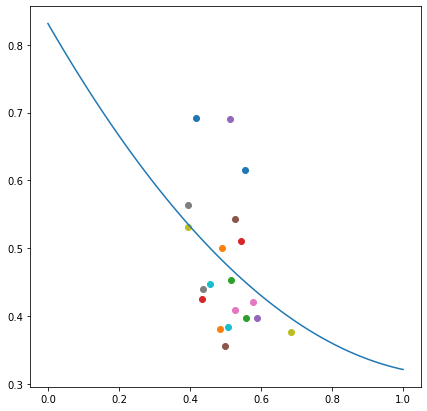

In [14]:
fig = plt.figure(figsize=(7,7))
Xc = np.linspace(0, 1, 100);
Yc = (value(instance.a)*Xc**2 + value(instance.b)*Xc + value(instance.c))
plt.plot(Xc, Yc)
#plt.legend(ncol=3)
for i in instance.i:
    plt.scatter(value(instance.Xloc[i]), value(instance.Yloc[i]), label=str(i))